In [2]:
import pandas as pd
import numpy as np

In [3]:
dir = r"D:\Fernando\Escritorio\Encoded_data.csv"
data = pd.read_csv(dir)
data.head()

,DEPARTMENT_finishing,DEPARTMENT_sweing,TEAM_1,TEAM_2,TEAM_3,TEAM_4,TEAM_5,TEAM_6,TEAM_7,TEAM_8,...,TARGETED_PRODUCTIVITY,SMV,WIP,OVER_TIME,INCENTIVE,IDLE_TIME,IDLE_MEN,NO_OF_STYLE_CHANGE,NO_OF_WORKERS,ACTUAL_PRODUCTIVITY
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,0.020132,0.000000,0.064,0.000000,0.0,0.0,0.0,0.068966,0.886500
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,0.487418,0.252409,0.460,0.378151,0.0,0.0,0.0,0.637931,0.750428
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,0.020132,0.000000,0.064,0.000000,0.0,0.0,0.0,0.068966,0.755167
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,0.328494,0.271683,0.400,0.285714,0.0,0.0,0.0,0.609195,0.753098
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.75,0.487418,0.294663,0.460,0.378151,0.0,0.0,0.0,0.637931,0.753683


In [4]:
X_multiple = data.iloc[:, 0:23].round(2)
Y_multiple = data.iloc[:, 23].round(2)

In [5]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, Y_multiple, test_size=0.1)

In [6]:
#Definimos el algoritmo a utilizar
from sklearn import linear_model
lr_multiple = linear_model.LinearRegression()

In [7]:
#Entrenamos el modelo
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [8]:
#Realizamos una predicción
Y_pred_multiple = lr_multiple.predict(X_test)

In [9]:
print(lr_multiple.score(X_train, y_train))

0.3640245555749656


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error

In [13]:
pred_linreg = lr_multiple.predict(X_test)
print("MAE  :", mean_absolute_error(y_test, pred_linreg))
print("MSE  :", mean_squared_error(y_test, pred_linreg))
print("RMSE :",sqrt(mean_squared_error(y_test, pred_linreg)))
print("MAPE :",mean_absolute_percentage_error(y_test, pred_linreg))

MAE  : 0.10696626420454546
MSE  : 0.023952632564197888
RMSE : 0.15476638060056158
MAPE : 0.20396675233798572


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
import multiprocessing
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense

In [ ]:
modelo = Sequential()
modelo.add(Dense(46, input_dim=23, activation='tanh'))
modelo.add(Dense(32, activation='relu'))
modelo.add(Dense(16, activation='tanh'))
modelo.add(Dense(1, activation='sigmoid'))
 
modelo.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

# Entrenamos el modelo. Le decimos a la función fit que lo haga 100 veces con epoch. 
# ¿Esto es mucho o poco? Lo averiguaremos cuando grafiquemos la función de pérdida.
modelo.fit(X_train, y_train, epochs=200, verbose=False)

In [ ]:
# evaluamos el modelo
scores = modelo.evaluate(X_train, y_train)

28/28 [==============================] - 5s 3ms/step - loss: 0.0138 - binary_accuracy: 0.0262


In [ ]:
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))
a = modelo.predict(X_test).round(2)


binary_accuracy: 2.62%
7/7 [==============================] - 5s 3ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error

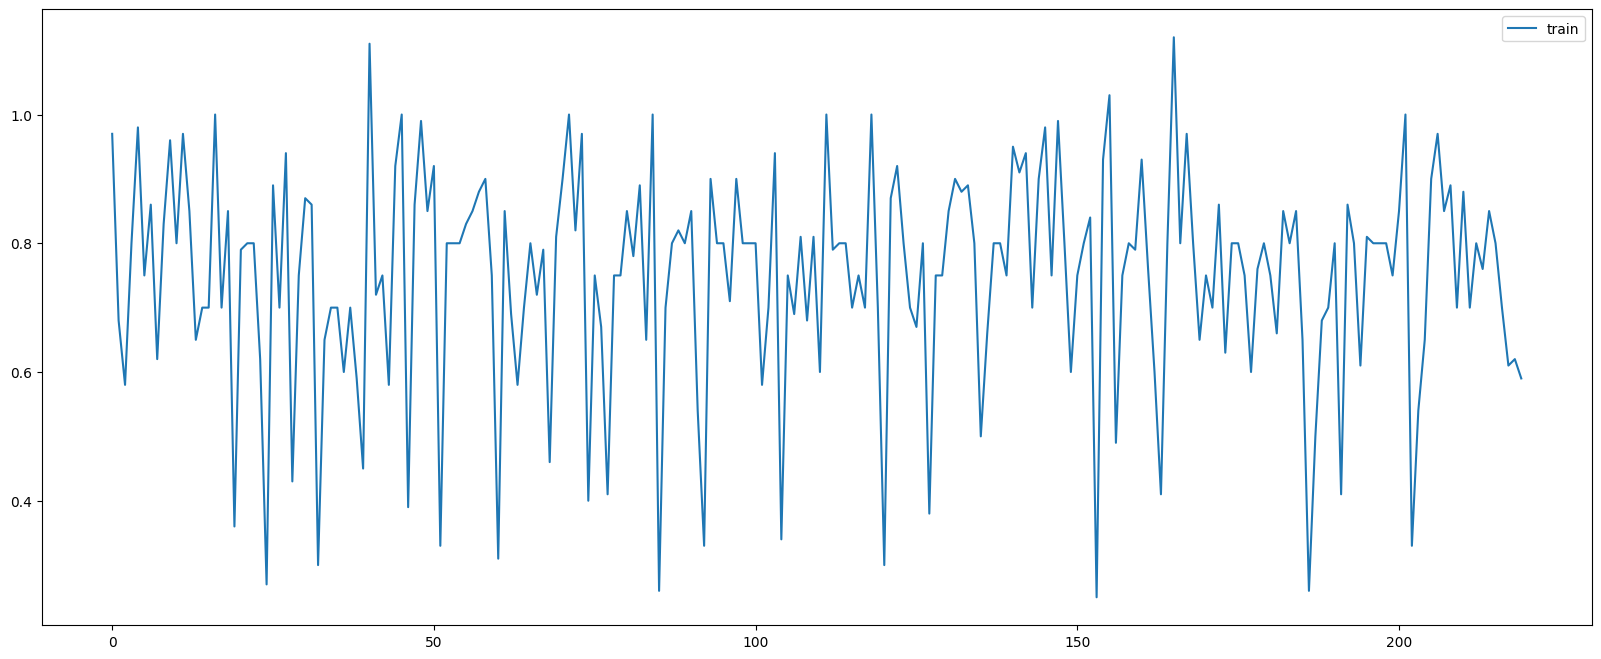

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
b = np.arange(0, len(a), 1)
#plt.plot(b, a, label='predicted')
plt.plot(b, y_test, label='train')
plt.legend(loc=0)